<a href="https://colab.research.google.com/github/Vanepeace/Monografia/blob/main/EDA_Nac(V2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS EXPLORATORIO INICIAL**

#**Imports**

In [ ]:
!pip install pyspark
!pip install feature-engine


# Instalar gdown
!pip install gdown

# Importar las bibliotecas necesarias
import gdown
from pyspark.sql import SparkSession
from pyspark.sql.functions import count
from pyspark.ml.feature import OneHotEncoder
from pyspark.sql.functions import col
from pyspark.sql import functions as F
from feature_engine.encoding import RareLabelEncoder, DecisionTreeEncoder
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt


# Crear una sesión de Spark
spark = SparkSession.builder \
    .appName("natalidad") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()

# Enlace directo al archivo CSV en Google Drive
url = 'https://drive.google.com/uc?id=1INsg1mVFRwMuLC4JSO5A62oJU4S81uOo'
filename_csv = 'nac_hist.csv'

# Descargar el archivo CSV directamente desde Google Drive usando gdown
gdown.download(url, filename_csv, quiet=False)

# Leer el archivo CSV en PySpark
nac_spark = spark.read.csv(filename_csv, header=True, inferSchema=True)

# Mostrar las primeras filas para verificar
nac_spark.show(5)



Downloading...
From (original): https://drive.google.com/uc?id=1INsg1mVFRwMuLC4JSO5A62oJU4S81uOo
From (redirected): https://drive.google.com/uc?id=1INsg1mVFRwMuLC4JSO5A62oJU4S81uOo&confirm=t&uuid=e96f9b70-2270-460e-a517-1462c6ebdbf7
To: /content/nac_hist.csv
100%|██████████| 252M/252M [00:03<00:00, 72.5MB/s]


+---+--------+---------+-------+---------+--------+----+--------+---------+----+---+--------+-----+--------------+---------+----------+---------+------+------+----------+----------+--------+----------+--------+--------+---------+-------+--------+--------+--------+--------+----------+-----+----------+----------+----------+--------+---------+---------+--------------+
|_c0|COD_DPTO|COD_MUNIC|AREANAC|SIT_PARTO|OTRO_SIT|SEXO|PESO_NAC|TALLA_NAC| ANO|MES|ATEN_PAR|T_GES|T_GES_AGRU_CIE|NUMCONSUL|TIPO_PARTO|MUL_PARTO|APGAR1|APGAR2|IDHEMOCLAS|IDFACTORRH|IDPERTET|EDAD_MADRE|EST_CIVM|NIV_EDUM|ULTCURMAD|CODPRES|CODPTORE|CODMUNRE|AREA_RES|N_HIJOSV|FECHA_NACM|N_EMB|SEG_SOCIAL|IDCLASADMI|EDAD_PADRE|NIV_EDUP|ULTCURPAD|PROFESION|TIPOFORMULARIO|
+---+--------+---------+-------+---------+--------+----+--------+---------+----+---+--------+-----+--------------+---------+----------+---------+------+------+----------+----------+--------+----------+--------+--------+---------+-------+--------+--------+--------+

##**Visualización de dataframe**

In [ ]:
# Mostrar las primeras 10 filas del DataFrame
nac_spark.show()

+---+--------+---------+-------+---------+--------+----+--------+---------+----+---+--------+-----+--------------+---------+----------+---------+------+------+----------+----------+--------+----------+--------+--------+---------+-------+--------+--------+--------+--------+----------+-----+----------+----------+----------+--------+---------+---------+--------------+
|_c0|COD_DPTO|COD_MUNIC|AREANAC|SIT_PARTO|OTRO_SIT|SEXO|PESO_NAC|TALLA_NAC| ANO|MES|ATEN_PAR|T_GES|T_GES_AGRU_CIE|NUMCONSUL|TIPO_PARTO|MUL_PARTO|APGAR1|APGAR2|IDHEMOCLAS|IDFACTORRH|IDPERTET|EDAD_MADRE|EST_CIVM|NIV_EDUM|ULTCURMAD|CODPRES|CODPTORE|CODMUNRE|AREA_RES|N_HIJOSV|FECHA_NACM|N_EMB|SEG_SOCIAL|IDCLASADMI|EDAD_PADRE|NIV_EDUP|ULTCURPAD|PROFESION|TIPOFORMULARIO|
+---+--------+---------+-------+---------+--------+----+--------+---------+----+---+--------+-----+--------------+---------+----------+---------+------+------+----------+----------+--------+----------+--------+--------+---------+-------+--------+--------+--------+

##**Estadística descriptiva**

In [ ]:
# Mostrar la estructura del DataFrame
nac_spark.printSchema()

# Contar el número de filas y columnas
num_rows = nac_spark.count()
num_cols = len(nac_spark.columns)
print(f"Número de filas: {num_rows}, Número de columnas: {num_cols}")

root
 |-- _c0: integer (nullable = true)
 |-- COD_DPTO: integer (nullable = true)
 |-- COD_MUNIC: integer (nullable = true)
 |-- AREANAC: integer (nullable = true)
 |-- SIT_PARTO: integer (nullable = true)
 |-- OTRO_SIT: string (nullable = true)
 |-- SEXO: integer (nullable = true)
 |-- PESO_NAC: integer (nullable = true)
 |-- TALLA_NAC: integer (nullable = true)
 |-- ANO: integer (nullable = true)
 |-- MES: integer (nullable = true)
 |-- ATEN_PAR: integer (nullable = true)
 |-- T_GES: integer (nullable = true)
 |-- T_GES_AGRU_CIE: string (nullable = true)
 |-- NUMCONSUL: integer (nullable = true)
 |-- TIPO_PARTO: integer (nullable = true)
 |-- MUL_PARTO: integer (nullable = true)
 |-- APGAR1: integer (nullable = true)
 |-- APGAR2: integer (nullable = true)
 |-- IDHEMOCLAS: integer (nullable = true)
 |-- IDFACTORRH: integer (nullable = true)
 |-- IDPERTET: integer (nullable = true)
 |-- EDAD_MADRE: integer (nullable = true)
 |-- EST_CIVM: integer (nullable = true)
 |-- NIV_EDUM: intege

In [ ]:
# Estadística descriptiva
nac_spark.describe().show()

+-------+-----------------+------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+-------------------+
|summary|              _c0|          COD_DPTO|         COD_MUNIC|           AREANAC|          SIT_PARTO|            OTRO_SIT|              SEXO|          PESO_NAC|         TALLA_NAC|               ANO|               MES|          ATEN_P

##**Categorización de variables**

In [ ]:
# Recuento de valores únicos por columna (cada variable tiene una cantidad en especifico de respuestas es decir el numero de categorias que responden a mi variable)
for col in nac_spark.columns:
    unique_count = nac_spark.select(col).distinct().count()
    print(f"Columna: {col}, Valores únicos: {unique_count}")

Columna: _c0, Valores únicos: 2462601
Columna: COD_DPTO, Valores únicos: 33
Columna: COD_MUNIC, Valores únicos: 563
Columna: AREANAC, Valores únicos: 4
Columna: SIT_PARTO, Valores únicos: 4
Columna: OTRO_SIT, Valores únicos: 1677
Columna: SEXO, Valores únicos: 3
Columna: PESO_NAC, Valores únicos: 9
Columna: TALLA_NAC, Valores únicos: 7
Columna: ANO, Valores únicos: 4
Columna: MES, Valores únicos: 12
Columna: ATEN_PAR, Valores únicos: 7
Columna: T_GES, Valores únicos: 7
Columna: T_GES_AGRU_CIE, Valores únicos: 8
Columna: NUMCONSUL, Valores únicos: 27
Columna: TIPO_PARTO, Valores únicos: 5
Columna: MUL_PARTO, Valores únicos: 5
Columna: APGAR1, Valores únicos: 11
Columna: APGAR2, Valores únicos: 11
Columna: IDHEMOCLAS, Valores únicos: 5
Columna: IDFACTORRH, Valores únicos: 3
Columna: IDPERTET, Valores únicos: 7
Columna: EDAD_MADRE, Valores únicos: 10
Columna: EST_CIVM, Valores únicos: 7
Columna: NIV_EDUM, Valores únicos: 14
Columna: ULTCURMAD, Valores únicos: 15
Columna: CODPRES, Valores 

#❗**Calculo de la tasa de natalidad:**

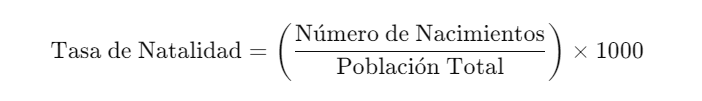

In [ ]:
# Crear un DataFrame con la información de nacimientos y población
data = {
    'Año': [2019, 2020, 2021, 2022,2023],
    'Nacimientos': [658835, 629402, 616914, 573625, 510357],
    'Población': [49510000, 50340000, 50880000, 51250000, 52215503]
}

df_nacimientos = pd.DataFrame(data)

# Calcular la tasa de natalidad
df_nacimientos['Tasa de Natalidad'] = (df_nacimientos['Nacimientos'] / df_nacimientos['Población']) * 1000

# Mostrar el DataFrame con la tasa de natalidad
print(df_nacimientos)


    Año  Nacimientos  Población  Tasa de Natalidad
0  2019       658835   49510000          13.307110
1  2020       629402   50340000          12.503019
2  2021       616914   50880000          12.124882
3  2022       573625   51250000          11.192683
4  2023       510357   52215503           9.774051


##**Conteo y visualización de nulos**

In [ ]:

# Contar filas totales
total_rows = nac_spark.count()

# Calcular porcentaje de completitud (valores no nulos) por columna
nac_spark.select([(count(c)/total_rows).alias(c) for c in nac_spark.columns]).show()

In [ ]:
# Para graficar convertimos el DataFrame de PySpark a Pandas
nac_pd = nac_spark.toPandas()

In [ ]:
# Visualizar columnas con valores nulos

missing_values = nac_pd.isnull().sum()
missing_percentage = (missing_values / len(nac_pd)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

plt.figure(figsize=(10, 6))
missing_data[missing_data['Missing Values'] > 0].plot(kind='bar', legend=False)
plt.title('Valores Faltantes en el Conjunto de Datos')
plt.ylabel('Cantidad de Valores Faltantes')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.show()

### **Revisión de valores duplicados**

In [ ]:
# Registros duplicados
duplicate_counts = nac_spark.groupBy(nac_spark.columns).count().filter("count > 1")
num_duplicates = duplicate_counts.count()

print(f"Número de registros duplicados: {num_duplicates}")

##**Análisis de variables a eliminar**

 Se decide eliminar inicialmente las columnas TIPOFORMULARIO y c_0 ya que
no aportan información relavante al análisis.

In [ ]:
# Eliminar columnas
nac_pd = nac_pd.drop(columns=["TIPOFORMULARIO", "_c0"])
nac_pd.head(10)

##**Label Encoding para las variables con un orden implícito (ordinales)**
###Convierte categorías en números, ideal para variables con orden.

In [ ]:
from pyspark.ml.feature import StringIndexer


# Lista de variables para Label Encoding (categóricas ordinales)
label_encoding_columns = ['MES', 'T_GES', 'NIV_EDUM', 'ULTCURMAD', 'NIV_EDUP', 'ULTCURPAD']

# Aplicar Label Encoding (StringIndexer) a cada columna ordinal
for col in label_encoding_columns:
    indexer = StringIndexer(inputCol=col, outputCol=col + "_indexed")
    nac_spark = indexer.fit(nac_spark).transform(nac_spark)

# Visualizar las columnas con Label Encoding aplicado
nac_spark.select([col + "_indexed" for col in label_encoding_columns]).show(5)



##**One-Hot Encoding para las variables sin orden implícito (nominales)**.

###Crea columnas binarias para cada categoría, ideal para variables sin orden.

In [ ]:


# Lista de variables para One-Hot Encoding (categóricas nominales)
one_hot_encoding_columns = ['COD_DPTO', 'COD_MUNIC', 'AREANAC', 'SIT_PARTO', 'SEXO',
                            'ATEN_PAR', 'T_GES_AGRU_CIE', 'TIPO_PARTO', 'MUL_PARTO',
                            'IDHEMOCLAS', 'IDFACTORRH', 'IDPERTET', 'EST_CIVM',
                            'CODPRES', 'CODPTORE', 'CODMUNRE', 'AREA_RES', 'SEG_SOCIAL',
                            'IDCLASADMI', 'PROFESION',]

# Aplicar StringIndexer y luego OneHotEncoder
for col_name in one_hot_encoding_columns:
    # Verificar si la columna indexada ya existe
    if col_name + "_indexed" not in nac_spark.columns:
        # StringIndexer (para convertir a valores numéricos)
        indexer = StringIndexer(inputCol=col_name, outputCol=col_name + "_indexed")
        nac_spark = indexer.fit(nac_spark).transform(nac_spark)

    # Verificar si la columna one-hot ya existe
    if col_name + "_onehot" not in nac_spark.columns:
        # OneHotEncoder (para convertir a una representación "one-hot")
        encoder = OneHotEncoder(inputCol=col_name + "_indexed", outputCol=col_name + "_onehot")
        nac_spark = encoder.fit(nac_spark).transform(nac_spark)

# Visualizar las columnas con One-Hot Encoding aplicado
nac_spark.select([col_name + "_onehot" for col_name in one_hot_encoding_columns]).show(5)




+---------------+----------------+--------------+----------------+-------------+---------------+---------------------+-----------------+----------------+-----------------+-----------------+---------------+---------------+--------------+---------------+-----------------+---------------+-----------------+-----------------+----------------+
|COD_DPTO_onehot|COD_MUNIC_onehot|AREANAC_onehot|SIT_PARTO_onehot|  SEXO_onehot|ATEN_PAR_onehot|T_GES_AGRU_CIE_onehot|TIPO_PARTO_onehot|MUL_PARTO_onehot|IDHEMOCLAS_onehot|IDFACTORRH_onehot|IDPERTET_onehot|EST_CIVM_onehot|CODPRES_onehot|CODPTORE_onehot|  CODMUNRE_onehot|AREA_RES_onehot|SEG_SOCIAL_onehot|IDCLASADMI_onehot|PROFESION_onehot|
+---------------+----------------+--------------+----------------+-------------+---------------+---------------------+-----------------+----------------+-----------------+-----------------+---------------+---------------+--------------+---------------+-----------------+---------------+-----------------+----------------

**Variables no incluidas en One-Hot Encoding:**
Variables continuas o numéricas (no categóricas):

PESO_NAC (Peso al nacer)

TALLA_NAC (Talla al nacer)

ANO (Año de nacimiento)

MES (Mes de nacimiento)

NUMCONSUL (Número de consultas prenatales)

APGAR1 (Primer puntaje de Apgar)

APGAR2 (Segundo puntaje de Apgar)

EDAD_MADRE (Edad de la madre)

EDAD_PADRE (Edad del padre)

N_HIJOSV (Número de hijos vivos)

N_EMB (Número de embarazos)

In [ ]:
# Contar el número de registros nulos en FECHA_NACM
null_count = nac_spark.filter(nac_spark["FECHA_NACM"].isNull()).count()

# Mostrar el resultado
print(f"Número de registros nulos en FECHA_NACM: {null_count}")


Número de registros nulos en FECHA_NACM: 0


In [ ]:
# Verificar valores únicos y sus conteos para EDAD_MADRE
print("Valores únicos y conteos de EDAD_MADRE:")
nac_spark.groupBy("EDAD_MADRE").count().orderBy("EDAD_MADRE").show()

# Verificar valores únicos y sus conteos para EDAD_PADRE
print("Valores únicos y conteos de EDAD_PADRE:")
nac_spark.groupBy("EDAD_PADRE").count().orderBy("EDAD_PADRE").show()


Valores únicos y conteos de EDAD_MADRE:
+----------+------+
|EDAD_MADRE| count|
+----------+------+
|         1| 18217|
|         2|430553|
|         3|699536|
|         4|612822|
|         5|414399|
|         6|220134|
|         7| 57875|
|         8|  3990|
|         9|   533|
|        99|  4542|
+----------+------+

Valores únicos y conteos de EDAD_PADRE:
+----------+------+
|EDAD_PADRE| count|
+----------+------+
|        12|     3|
|        13|   103|
|        14|   534|
|        15|  2421|
|        16|  8098|
|        17| 21306|
|        18| 43491|
|        19| 52951|
|        20| 92656|
|        21| 86687|
|        22|107444|
|        23|117574|
|        24|117253|
|        25|150434|
|        26|121869|
|        27|119426|
|        28|136606|
|        29|109940|
|        30|165596|
|        31| 89025|
+----------+------+
only showing top 20 rows

Número de registros atípicos: 2458216


In [ ]:
# Verificar valores únicos y sus conteos para EDAD_PADRE
print("Valores únicos y conteos de PESO_NAC:")
nac_spark.groupBy("PESO_NAC").count().orderBy("PESO_NAC").show()

# Verificar valores únicos y sus conteos para EDAD_PADRE
print("Valores únicos y conteos de TALLA_NAC:")
nac_spark.groupBy("TALLA_NAC").count().orderBy("TALLA_NAC").show()

Valores únicos y conteos de PESO_NAC:
+--------+-------+
|PESO_NAC|  count|
+--------+-------+
|       1|   9825|
|       2|  18562|
|       3|  43377|
|       4| 165054|
|       5| 694533|
|       6|1033665|
|       7| 410517|
|       8|  60595|
|       9|  26473|
+--------+-------+

Valores únicos y conteos de TALLA_NAC:
+---------+-------+
|TALLA_NAC|  count|
+---------+-------+
|        1|     10|
|        2|   1656|
|        3|  23627|
|        4|1027130|
|        5|1383058|
|        6|    425|
|        9|  26695|
+---------+-------+



In [ ]:
# Filtrar valores negativos en PESO_NAC y TALLA_NAC
negative_weight_height = nac_spark.select(
    'PESO_NAC',
    'TALLA_NAC'
).filter((nac_spark['PESO_NAC'] < 0) | (nac_spark['TALLA_NAC'] < 0))

# Mostrar resultados de pesos y tallas negativas
negative_weight_height.show()


+--------+---------+
|PESO_NAC|TALLA_NAC|
+--------+---------+
+--------+---------+



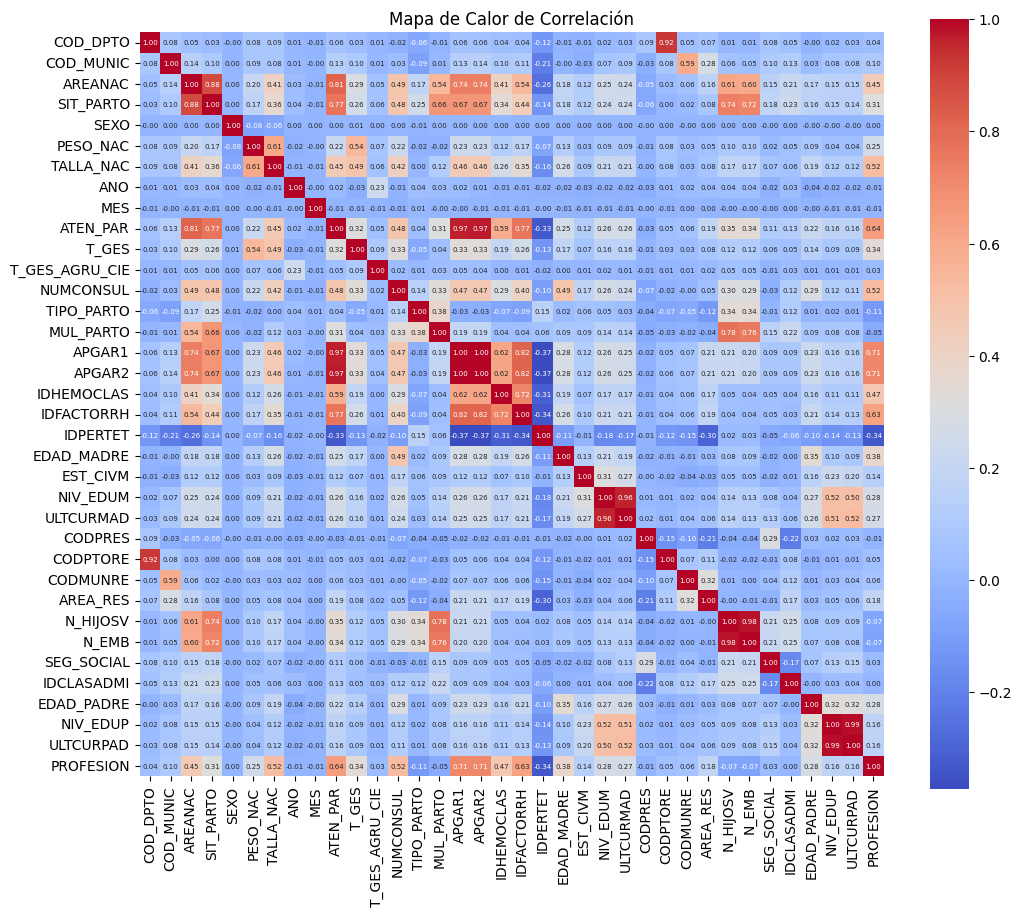

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = nac_pd.corr()

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear el heatmap con seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,  annot_kws={"size": 5})

# Añadir un título
plt.title('Mapa de Calor de Correlación')

# Mostrar el gráfico
plt.show()


##**OTRA FORMA PARA APLICAR ONE HOTE Y LABEL ENCODING CON ÁRBOLES**

In [ ]:
# Crear sesión Spark si no la tienes ya
spark = SparkSession.builder.appName("DecisionTreeEncoder").getOrCreate()


# Definir las columnas categóricas que quieres codificar
categorical_columns = [
    'COD_DPTO', 'COD_MUNIC', 'AREANAC', 'SIT_PARTO', 'SEXO', 'ATEN_PAR',
    'T_GES', 'TIPO_PARTO', 'MUL_PARTO', 'APGAR1', 'APGAR2', 'IDHEMOCLAS',
    'IDFACTORRH', 'IDPERTET', 'EST_CIVM', 'NIV_EDUM', 'ULTCURMAD',
    'SEG_SOCIAL', 'NIV_EDUP', 'ULTCURPAD'
]

# Asegurarse de que las variables categóricas son del tipo correcto
for col in categorical_columns:
    nac_pd[col] = nac_pd[col].astype('category')

# Aplicar RareLabelEncoder para consolidar categorías raras
rare_encoder = RareLabelEncoder(tol=0.01, n_categories=5, variables=categorical_columns)
nac_pd_encoded_rare = rare_encoder.fit_transform(nac_pd)

# Aplicar DecisionTreeEncoder
tree_encoder = DecisionTreeEncoder(
    encoding_method='arbitrary',  # Puedes usar 'arbitrary' o 'ordered'
    variables=categorical_columns  # Variables categóricas a codificar
)

nac_pd_encoded_tree = tree_encoder.fit_transform(nac_pd_encoded_rare, nac_pd['TASA_NATALIDAD'])  # Supongo que 'TASA_NATALIDAD' es la variable objetivo

# Volver a convertir el DataFrame codificado a Spark
nac_spark_encoded = spark.createDataFrame(nac_pd_encoded_tree)

# Mostrar las primeras filas del DataFrame codificado
nac_spark_encoded.show(10)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable AREANAC is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable SIT_PARTO is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable SEXO is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable TIPO_PARTO is less than that indicated in n_categories. Thus, all categories wil

KeyError: 'TASA_NATALIDAD'